In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import re
import spacy
import  nltk
print(nltk.__version__)
print(spacy.__version__)

3.4.5
3.4.3


In [3]:
pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nlp_id #indonesian library
from nlp_id.lemmatizer import Lemmatizer
from nlp_id.tokenizer import Tokenizer
lemmatizer = Lemmatizer()
tokenizer = Tokenizer()
from nlp_id.stopword import StopWord
stopword = StopWord()

In [5]:
from spacy.lang.id.examples import sentences

In [6]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
import keras.utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer as kerasTok
from keras import Model
from keras.utils import to_categorical
from keras.utils import pad_sequences 

#Importing the indonesian song dataset

In [8]:
with open ('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_id.pkl', mode='br') as inputfile:
  df_id = pickle.load(inputfile)

In [9]:
df_id.shape

(737, 5)

In [10]:
df_id = df_id.reset_index()
df_id = df_id.drop(['index'], axis = 1)

In [11]:
df_id

,Artist,Song,Genre,Language,Lyrics
0,david bowie,amlapura (indonesian version),Rock,id,hey hey ada kapal layar menuju jawa dari jalan...
1,david bowie,everything is you,Rock,id,buh duh buh duh buh buh duh buh duh buh buh du...
2,drive,a song for brokenhearts,Metal,id,kesalahan membuat kita belajar menjadikan kita...
3,drive,bahagia untukmu,Metal,id,lihatlah dirimu terus berjalan dalam mimpi ind...
4,drive,a song for brokenhearts,Metal,id,kesalahan membuat kita belajar menjadikan kita...
...,...,...,...,...,...
732,anji,cukup 3 kata,Folk,id,aku rindu kamu aku buth kamu begitu dalam begi...
733,anji,resah tanpamu,Folk,id,sayang aku tahu kita tak banyak bicara kau jau...
734,dreamland,i think i m falling in love,Metal,id,di setiap langkahku kau slalu membayangi gerak...
735,geoffrey gurrumul yunupingu,wiyathul,Folk,id,m m m rrma dji awurr thinana nambawu arru ana ...


#Splitting the dataset in training set and test set

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
id_train, id_test = sklearn.model_selection.train_test_split(df_id, test_size=0.20, train_size=0.80)

In [14]:
id_train.shape, id_test.shape

((589, 5), (148, 5))

In [15]:
df_id['Genre'].value_counts() 

Pop           569
Rock           87
Jazz           33
Indie          26
Metal          17
Folk            4
Electronic      1
Name: Genre, dtype: int64

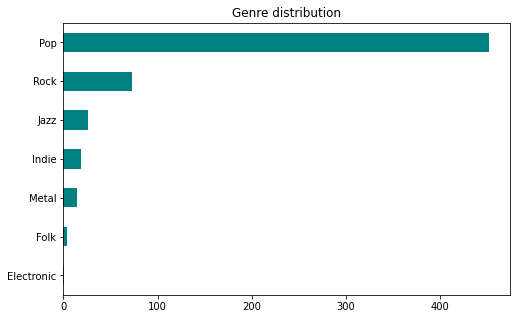

In [16]:
plt.rcParams['figure.figsize'] = [8,5]
x = id_train['Genre'].value_counts().sort_values(ascending = True)
plt.title("Genre distribution")
x.plot(kind ='barh', color="teal")

#Tokenizing the lyrics with Kumparan's NLP tokenizer

In [17]:
x_train = id_train['Lyrics'].tolist()
y_train = id_train['Genre'].tolist()

In [18]:
x_test = id_test['Lyrics'].tolist()
y_test = id_test['Genre'].tolist()

In [19]:
len(x_train), len(y_train), len(x_test), len(y_test)

(589, 589, 148, 148)

In [20]:
set(y_train)

{'Electronic', 'Folk', 'Indie', 'Jazz', 'Metal', 'Pop', 'Rock'}

In [21]:
sample_idx = 79
x_train[sample_idx]

'sora wa ayashiku hikari hajimete nukumori sae mo nai nai nai tada furitsuzukeru amaoto kodamashite futari madowaseru oh no teki na no ka mikata na no ka wakaranai demo it s tme to pay the price subete ga kawaru shunkan yamanai naitemo yamanai inottemo watashitachi wo ima washing away mou tsunagi tomerarenai saigou no daishou wa sou just let it rain let it rain let it rain just let it rain let it rain let it rain mitenai furishite mukiatte konakatta kizuiteta no ni it s over over taenai ame wa sou azawarau ka no you ni sara ni tatakizukeru teki na no ka mikata na no ka wakaranai demo it s tme to pay the price subete ga kawaru shunkan yamanai naitemo yamanai inottemo watashitachi wo ima washing away mou tsunagi tomerarenai saigou no daishou wa sou just let it rain let it rain let it rain just let it rain let it rain let it rain ameagatta ato tatoe anata no sugata nakutemo gotta go gotta let you go kitto watashi wa tomadowanai wa aruki hajimeru sun will shine yamanai naitemo yamanai inot

In [22]:
y_train[sample_idx]

'Pop'

In [23]:
import string
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopword.get_stopword() #from nlp-id module
punctuations = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
def kumparan_nlp_tokenizer (text):
   
    doc = tokenizer.tokenize(text) #nlp-id tokenizer

    #lemmatizing tokens and lowering case
    lemmas = [lemmatizer.lemmatize(token) for token in doc]

    #removing stopwords and punctuations
    lemmas_stop = [token for token in lemmas if token not in stopword_list and token not in punctuations]  

    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_stop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_stop,3)] 
    
    all_tokens = list()
    all_tokens.extend(lemmas_stop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

#Token vectorization with CountVectorizer and kumparan's nlp tokenizer function above

In [25]:
vectors = CountVectorizer (analyzer = kumparan_nlp_tokenizer, min_df = 5)

In [26]:
print ('fit')
vectors.fit(x_train)
print('transform')
x_train_tok = vectors.transform(x_train)
x_test_tok = vectors.transform(x_test)
print ('done')

fit
transform
done


In [27]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id_x_train_tok.pkl', 'wb') as outfile:
  pickle.dump(x_train_tok, outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id_x_test_tok.pkl', 'wb') as outfile:
  pickle.dump(x_test_tok, outfile)

In [28]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id_x_train_tok.pkl', mode = 'br') as infile:
  x_train_tok = pickle.load(infile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id_x_test_tok.pkl', mode = 'br') as infile:
  x_test_tok = pickle.load(infile)

In [29]:
len(vectors.vocabulary_)

3703

In [30]:
vectors.vocabulary_

{'don': 1846,
 't': 3410,
 'stop': 3379,
 'henti': 2285,
 'my': 2901,
 'love': 2690,
 'tolong': 3481,
 'biar': 1592,
 'ku': 2635,
 'go': 2146,
 'to': 3475,
 'heaven': 2279,
 'mu': 2879,
 'lari': 2655,
 'cause': 1680,
 'i': 2343,
 'm': 2697,
 'loving': 2692,
 'you': 3686,
 'diam': 1822,
 'bisik': 1605,
 'ah': 1433,
 'teman': 3436,
 'kelas': 2577,
 'jalan': 2447,
 'pulang': 3141,
 'angin': 1476,
 'canda': 1676,
 'bicara': 1593,
 'cinta': 1731,
 'tak': 3419,
 'putar': 3148,
 'say': 3254,
 'katak': 2572,
 'why': 3605,
 'not': 3025,
 'hingga': 2306,
 'kenang': 2578,
 'be': 1567,
 'loved': 2691,
 'one': 3071,
 'way': 3590,
 'dada': 1750,
 'so': 3341,
 'pikir': 3121,
 'arti': 1515,
 'sadar': 3199,
 'balas': 1539,
 'langit': 2653,
 'senja': 3271,
 'warna': 3586,
 'kota': 2633,
 'sedih': 3260,
 'bayang': 1565,
 'BI_don_t': 155,
 'BI_t_stop': 828,
 'BI_my_love': 561,
 'BI_biar_ku': 77,
 'BI_mu_ku': 545,
 'BI_ku_lari': 438,
 'BI_cause_i': 105,
 'BI_i_m': 326,
 'BI_cinta_tak': 118,
 'BI_t_say': 82

#SVM Classification

---



---



In [31]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train,y_train)
predictions = svm_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)


Classification report:
              precision    recall  f1-score   support

       Indie       0.67      0.29      0.40         7
        Jazz       0.75      0.43      0.55         7
       Metal       0.00      0.00      0.00         3
         Pop       0.86      0.97      0.91       117
        Rock       0.40      0.29      0.33        14

    accuracy                           0.82       148
   macro avg       0.54      0.39      0.44       148
weighted avg       0.79      0.82      0.80       148

Confusion matrix:
[[  2   1   0   1   3]
 [  0   3   0   4   0]
 [  0   0   0   3   0]
 [  1   0   0 113   3]
 [  0   0   0  10   4]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classification with tokenized lyrics - no optimization

In [32]:
svm_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train_tok,y_train)
predictions = svm_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)


Classification report:
              precision    recall  f1-score   support

       Indie       1.00      0.14      0.25         7
        Jazz       0.00      0.00      0.00         7
       Metal       0.00      0.00      0.00         3
         Pop       0.84      0.97      0.90       117
        Rock       0.38      0.21      0.27        14

    accuracy                           0.80       148
   macro avg       0.44      0.27      0.28       148
weighted avg       0.75      0.80      0.75       148

Confusion matrix:
[[  1   0   0   3   3]
 [  0   0   0   6   1]
 [  0   0   0   3   0]
 [  0   2   0 114   1]
 [  0   1   0  10   3]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classification with tokenized lyrics and optimized parameters

In [33]:
opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

param_grid = [{'sel__k': [50, 100, 250,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]}]
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=None, n_jobs = 3, verbose=True).fit(x_train_tok,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  65 tasks      | elapsed:    5.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    8.8s finished


In [34]:
SVM_opt_search.best_params_

{'learner__C': 10, 'sel__k': 'all'}

In [35]:
SVM_opt_search.best_estimator_

Pipeline(memory=None,
         steps=[('sel',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x7fae68b01710>)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('learner',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [36]:
opt_predictions = SVM_opt_search.best_estimator_.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Indie       1.00      0.29      0.44         7
        Jazz       0.40      0.29      0.33         7
       Metal       0.00      0.00      0.00         3
         Pop       0.89      0.96      0.92       117
        Rock       0.36      0.36      0.36        14

    accuracy                           0.82       148
   macro avg       0.53      0.38      0.41       148
weighted avg       0.80      0.82      0.80       148

Confusion matrix:
[[  2   0   0   1   4]
 [  0   2   0   3   2]
 [  0   0   0   2   1]
 [  0   2   1 112   2]
 [  0   1   0   8   5]]


Features that weight more on classification:

In [37]:
tokenizer = vectors
selector = svm_pipeline.named_steps['sel']
classifier = svm_pipeline.named_steps['learner']

In [38]:
feature_names = tokenizer.get_feature_names()
feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

3703

In [39]:
feats_w_score[:100],feats_w_score[-100:]

([(0.7743211298339192, True, 'BI_nae_maeumeun'),
  (0.7743211298339192, True, 'BI_nuga_bwado'),
  (0.7743211298339192, True, 'BI_the_roof'),
  (0.7743211298339192, True, 'asa'),
  (0.7743211298339192, True, 'cheoeumen'),
  (0.7743211298339192, True, 'gang'),
  (0.7743211298339192, True, 'himdeul'),
  (0.7743211298339192, True, 'hirau'),
  (0.7743211298339192, True, 'kkumeseo'),
  (0.7743211298339192, True, 'kkwak'),
  (0.7743211298339192, True, 'manyang'),
  (0.7743211298339192, True, 'suru'),
  (0.7743211298339192, True, 'toy'),
  (0.7743211298339192, True, 'tteun'),
  (0.7743211298339192, True, 'umur'),
  (0.7836101345617652, True, 'BI_nan_ajik'),
  (0.7836101345617652, True, 'BI_neoreul_mot'),
  (0.7836101345617652, True, 'BI_teman_ku'),
  (0.7836101345617652, True, 'cold'),
  (0.7836101345617652, True, 'ipsureul'),
  (0.7836101345617652, True, 'kkeutnamyeon'),
  (0.7836101345617652, True, 'kkwae'),
  (0.7836101345617652, True, 'lampu'),
  (0.7836101345617652, True, 'michil'),
  (0.

In [40]:
feats_w_classifier_weight = list()
for index,weight in enumerate(selector.inverse_transform(classifier.coef_)[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

3033

In [41]:
feats_w_classifier_weight[:100]

[(-0.11865365408536864, 'beautiful'),
 (-0.09253617240911181, 'so'),
 (-0.08878431884950251, 'wo'),
 (-0.08774565859409288, 'oh'),
 (-0.07977725982897728, 'cuz'),
 (-0.07063049166498774, 'love'),
 (-0.07010180304050066, 'pu'),
 (-0.06999515828339643, 'de'),
 (-0.06945452387333198, 'to'),
 (-0.06656237125605191, 'ni'),
 (-0.06641937567092081, 'BI_your_eyes'),
 (-0.0641149454857303, 'cool'),
 (-0.06180944721306793, 'ajar'),
 (-0.059336793093199974, 'nu'),
 (-0.058492344429596596, 'eyes'),
 (-0.05765069782050679, 'me'),
 (-0.05512665919650204, 'na'),
 (-0.055111949857949594, 'i'),
 (-0.05470315145867395, 'tak'),
 (-0.0523880026642912, 'night'),
 (-0.0513644766311955, 'neh'),
 (-0.05132586244946047, 'cinta'),
 (-0.05031421612094637, 'ren'),
 (-0.04988592629957824, 'gan'),
 (-0.04925366504727929, 'mu'),
 (-0.04751578869162996, 'shou'),
 (-0.047304332596791544, 'my'),
 (-0.046648390233216, 'BI_oh_oh'),
 (-0.04531811373305754, 'kar'),
 (-0.042901463019386764, 'shi'),
 (-0.04260533673359162, '

#Naïve Bayes Classification

---



---



In [42]:
NBC_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

NBC_pipeline.fit(x_train_tok,y_train)
predictions = NBC_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

  Electronic       0.00      0.00      0.00         0
       Indie       1.00      0.29      0.44         7
        Jazz       0.27      1.00      0.42         7
       Metal       0.00      0.00      0.00         3
         Pop       0.91      0.87      0.89       117
        Rock       0.67      0.29      0.40        14

    accuracy                           0.78       148
   macro avg       0.47      0.41      0.36       148
weighted avg       0.84      0.78      0.78       148

Confusion matrix:
[[  0   0   0   0   0   0]
 [  0   2   4   0   0   1]
 [  0   0   7   0   0   0]
 [  0   0   0   0   3   0]
 [  2   0  12   0 102   1]
 [  0   0   3   0   7   4]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree Classification

---



---



In [43]:
dt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', DecisionTreeClassifier())  # learning algorithm
])

dt_pipeline.fit(x_train_tok,y_train)
predictions = dt_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Indie       0.40      0.29      0.33         7
        Jazz       0.00      0.00      0.00         7
       Metal       0.00      0.00      0.00         3
         Pop       0.89      0.87      0.88       117
        Rock       0.29      0.43      0.34        14

    accuracy                           0.74       148
   macro avg       0.31      0.32      0.31       148
weighted avg       0.75      0.74      0.74       148

Confusion matrix:
[[  2   2   0   1   2]
 [  0   0   1   5   1]
 [  0   0   0   1   2]
 [  2   2   1 102  10]
 [  1   1   0   6   6]]


#Random Forest Classification

---



---



In [44]:
RF_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier())  # learning algorithm
])

RF_pipeline.fit(x_train_tok,y_train)
predictions = RF_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Indie       1.00      0.14      0.25         7
        Jazz       0.00      0.00      0.00         7
       Metal       0.00      0.00      0.00         3
         Pop       0.82      0.97      0.89       117
        Rock       0.33      0.21      0.26        14

    accuracy                           0.79       148
   macro avg       0.43      0.26      0.28       148
weighted avg       0.73      0.79      0.74       148

Confusion matrix:
[[  1   0   0   4   2]
 [  0   0   0   7   0]
 [  0   0   0   2   1]
 [  0   1   0 113   3]
 [  0   0   0  11   3]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#LSTM Classification 

---





In [45]:
id_train['Genre_number'] = id_train['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in id_train['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
   
  if i == 'Metal':
    numbers.append(2)
    
  if i == 'Jazz':
    numbers.append(3)

  if i == 'Folk':
   numbers.append(4)
  
  if i == 'Indie':
   numbers.append(5)

  elif i == 'Electronic':
    numbers.append(6)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
id_train['Genre_number'] = numbers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
id_test['Genre_number'] = id_test['Genre'] #converting the strings into int in the Genre column

numbers_test = []
for i in id_test['Genre']:
  if i == 'Rock':
    numbers_test.append(0)
  
  if i == 'Pop':
    numbers_test.append(1)
   
  if i == 'Metal':
    numbers_test.append(2)
    
  if i == 'Jazz':
    numbers_test.append(3)

  if i == 'Folk':
   numbers_test.append(4)
  
  if i == 'Indie':
   numbers_test.append(5)
  
  elif i == 'Electronic':
    numbers_test.append(6)
  
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
id_test['Genre_number'] = numbers_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
id_train.sample(5)

,Artist,Song,Genre,Language,Lyrics,Genre_number
140,2ne1,i love you,Pop,id,when you feel like there s no way out love is ...,1
39,big bang,천국 (heaven),Pop,id,saranghae nan neol gieokhae heaven sing it tog...,1
646,b1a4,mommy mommy,Pop,id,nee mommy mommy dou sureba ii no naze sono ko...,1
291,psy,bomb (feat. b.i & bobby),Rock,id,meoli wilo manse heundeul eo bamsae jigeumbute...,0
366,super junior,gray paper,Pop,id,mianhaeseo haneun mariya niga ulgo isseo haneu...,1


In [50]:
id_test.sample(5)

,Artist,Song,Genre,Language,Lyrics,Genre_number
630,st. vincent,power corrupts (zheng quan fu bai ),Pop,id,zheng quan nofu bai zheng quan nofu bai zheng ...,1
274,girls generation,touch the sky,Pop,id,all oh baby touch the sky deo nopee narawa ha...,1
41,big bang,always,Pop,id,oooh yeahhh calling you on the phone whenever ...,1
611,jkt48,bersama-sama semuanya (minasan mo go issho ni),Pop,id,masalah krismon sedang melanda indonesia lagi ...,1
162,2ne1,stay together,Pop,id,geoure bichyeojin nae moseupcheoreom geudaedo ...,1


In [51]:
y_train = id_train['Genre_number'] #substituting the columns in the variables
y_test = id_test['Genre_number']

In [52]:
y_train = to_categorical(y_train,7)  #converting to one-hot vectors
y_test = to_categorical(y_test, 7)

In [53]:
y_train.shape, y_test.shape

((589, 7), (148, 7))

In [54]:
#max number of words to be used
max_features = 20000
#max number of words in each lyrics
maxlen = 200
#fixed size
embed_size = 128

batch_size = 64
epochs = 10

tokenizer = kerasTok(num_words=max_features, lower=True) #keras tokenizer
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [55]:
X_train_final.shape, y_train.shape

((589, 200), (589, 7))

In [56]:
X_test_final.shape, y_test.shape

((148, 200), (148, 7))

In [57]:
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(LSTM(20, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 20)                11920     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 32)                672       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 2,572,823
Trainable params: 2,572,823
Non-

In [58]:
lstm = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=epochs, 
                 shuffle = True, 
                 validation_split=0.2, 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm

Epoch 1/10
8/8 [==============================] - 6s 374ms/step - loss: 1.8663 - accuracy: 0.5902 - val_loss: 1.6601 - val_accuracy: 0.7712
Epoch 2/10
8/8 [==============================] - 2s 310ms/step - loss: 1.5033 - accuracy: 0.7665 - val_loss: 1.2423 - val_accuracy: 0.7712
Epoch 3/10
8/8 [==============================] - 2s 312ms/step - loss: 1.1725 - accuracy: 0.7665 - val_loss: 0.9917 - val_accuracy: 0.7712
Epoch 4/10
8/8 [==============================] - 3s 412ms/step - loss: 1.0208 - accuracy: 0.7665 - val_loss: 0.9224 - val_accuracy: 0.7712
Epoch 5/10
8/8 [==============================] - 3s 315ms/step - loss: 0.9882 - accuracy: 0.7665 - val_loss: 0.9036 - val_accuracy: 0.7712
Epoch 6/10
8/8 [==============================] - 2s 309ms/step - loss: 0.9720 - accuracy: 0.7665 - val_loss: 0.8925 - val_accuracy: 0.7712
Epoch 7/10
8/8 [==============================] - 2s 304ms/step - loss: 0.9475 - accuracy: 0.7665 - val_loss: 0.8868 - val_accuracy: 0.7712
Epoch 8/10
8/8 [====

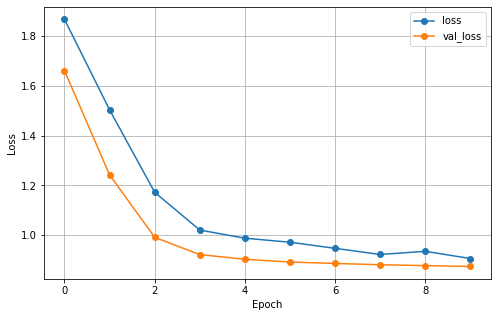

In [59]:
plt.plot(lstm.history['loss'], label='loss', marker = 'o')
plt.plot(lstm.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM Classification

In [60]:
lstm_pred= np.round(model.predict(X_test_final))

5/5 [==============================] - 1s 36ms/step


In [61]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.7905405405405406
F1-score [0.         0.88301887 0.         0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.79      1.00      0.88       117
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         0

   micro avg       0.79      0.79      0.79       148
   macro avg       0.11      0.14      0.13       148
weighted avg       0.62      0.79      0.70       148
 samples avg       0.79      0.79      0.79       148



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1511: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CNN Classification

In [62]:
#max number of words to be used
max_features = 20000
#max number of words in each lyrics
maxlen = 200
#fixed size
embed_size = 128

batch_size = 64
epochs = 20
filters = 10
kernel_size = 3
hidden_dims = 10

tokenizer = kerasTok(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [63]:
X_train_final[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,    39,    15,   398,   276,  6032,     9,    11,
        2119,  3902,  2334, 12794, 12795,   368,    90,    44,    28,
         114,   611,   611,   875,   554,  1246,    35,   225,   502,
        1415,  1066,     1,    26,  1962,     3,   467,  8087,  2580,
         114, 12796,  2580,  8088,    13,   125, 12797,   774,    29,
        1170,  1170,  3903,    18,   519,  3904,   218,   197,  1416,
        6033,   249,    13,   921,  8089,  2335,  8090,    13,   368,
         876,    18,    13,   293,  8091,  1795,   125,   293,  1247,
        1417,   877,   320,    90,    80,    33,  3905,    13,  6034,
         878,    39,    15,    91,   276,  3906,   232,   201,  1796,
         198,  1067,   845,   320,   301,  1418,    75,   718,   284,
        8092,   152,   555,   153,  6035,   612,   218,   249,     1,
          26,    61, 12798,   214,  8093, 12799,  8094,  1419, 12800,
       12801,  8088,

In [64]:
model = Sequential()

model.add(Embedding(max_features, embed_size))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(15))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 10)          3850      
                                                                 
 global_max_pooling1d (Globa  (None, 10)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 15)                165       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                      

In [65]:
cnn= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=30, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/30
9/9 [==============================] - 2s 126ms/step - loss: 1.8946 - accuracy: 0.2132 - val_loss: 1.8533 - val_accuracy: 0.7627
Epoch 2/30
9/9 [==============================] - 1s 98ms/step - loss: 1.8019 - accuracy: 0.5698 - val_loss: 1.7443 - val_accuracy: 0.7627
Epoch 3/30
9/9 [==============================] - 1s 95ms/step - loss: 1.6906 - accuracy: 0.6491 - val_loss: 1.6079 - val_accuracy: 0.7627
Epoch 4/30
9/9 [==============================] - 1s 97ms/step - loss: 1.5467 - accuracy: 0.6943 - val_loss: 1.4398 - val_accuracy: 0.7627
Epoch 5/30
9/9 [==============================] - 1s 96ms/step - loss: 1.4048 - accuracy: 0.6962 - val_loss: 1.2565 - val_accuracy: 0.7627
Epoch 6/30
9/9 [==============================] - 1s 94ms/step - loss: 1.2600 - accuracy: 0.7189 - val_loss: 1.0923 - val_accuracy: 0.7627
Epoch 7/30
9/9 [==============================] - 1s 93ms/step - loss: 1.1308 - accuracy: 0.7396 - val_loss: 0.9653 - val_accuracy: 0.7627
Epoch 8/30
9/9 [==========

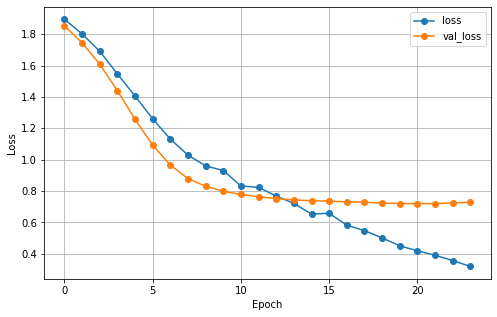

In [66]:
plt.plot(cnn.history['loss'], label='loss', marker = 'o')
plt.plot(cnn.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification

In [67]:
cnn_pred= np.round(model.predict(X_test_final))

5/5 [==============================] - 0s 7ms/step


In [68]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred, zero_division=1))

Accuracy 0.7837837837837838
F1-score [0.25       0.93442623 0.         0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.90      0.97      0.93       117
           2       1.00      0.00      0.00         3
           3       1.00      0.00      0.00         7
           4       1.00      1.00      1.00         0
           5       1.00      0.00      0.00         7
           6       1.00      1.00      1.00         0

   micro avg       0.90      0.78      0.84       148
   macro avg       0.27      0.16      0.17       148
weighted avg       0.80      0.78      0.76       148
 samples avg       0.78      0.78      0.78       148



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Classification with Word2Vec

In [69]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [70]:
pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import gensim
from gensim.models import Word2Vec

In [72]:
df_id['Genre_number'] = df_id['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in df_id['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
   
  if i == 'Metal':
    numbers.append(2)
    
  if i == 'Jazz':
    numbers.append(3)

  if i == 'Folk':
   numbers.append(4)
  
  if i == 'Indie':
   numbers.append(5)
  
  elif i == 'Electronic':
    numbers.append(6)
  

In [73]:
df_id['Genre_number'] = numbers

In [74]:
#Gensim word2vec requires sentences in input so i split the lyrics into sentences

sentence_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
sentences =[]
sum=0
for lyrics in df_id['Lyrics']:
  sents = sentence_splitter.tokenize(lyrics.strip())
  sum+=len(sents)
  for sent in sents:
    sentences.append(sent.split())
print(sum)
print(len(sentences))

737
737


In [75]:
#checking that the sentences are in the correct format
for sent in sentences[:5]:
  print(sent, "\n")

['hey', 'hey', 'ada', 'kapal', 'layar', 'menuju', 'jawa', 'dari', 'jalan', 'ke', 'jawa', 'jaga', 'jaga', 'jika', 'ada', 'orang', 'bugis', 'hey', 'hey', 'ini', 'mimpi', 'kukan', 'bakarmu', 'jika', 'kau', 'harus', 'pergi', 'hey', 'hey', 'kubakan', 'maka', 'diriku', 'jika', 'kau', 'baring', 'di', 'balai', 'bambu', 'kumimpi', 'tentang', 'amlapura', 'tak', 'pernah', 'kulihat', 'permata', 'seindah', 'ini', 'kumimpi', 'tentang', 'amlapura', 'lautan', 'atau', 'mimpi', 'tentang', 'patung', 'putri', 'hey', 'hey', 'patung', 'raja', 'dikalungi', 'mawar', 'emas', 'hey', 'hey', 'kanak', 'kanak', 'tewas', 'di', 'tempat', 'oleh', 'bedil', 'belanda', 'dari', 'kapal', 'letaknya', 'kumimpi', 'tentang', 'amlapura', 'tak', 'pernah', 'kulihat', 'permata', 'seindah', 'ini', 'kumimpi', 'tentang', 'amlapura', 'lautan', 'atau', 'mimpi', 'tentang', 'patung', 'putri', 'kumimpi', 'tentang', 'amlapura', 'tentang', 'patung', 'putri', 'hey', 'hey', 'ada', 'kapal', 'layar', 'kumimpi', 'tentang', 'amlapura', 'atas', 'd

In [76]:
#creating the w2v embeddings
w2v_model=gensim.models.Word2Vec(sentences=sentences, vector_size=300, window=10, min_count=1)

In [77]:
w2v_model.train(sentences, epochs=10, total_examples=len(sentences))

(1783834, 1884830)

In [78]:
#total num of extracted words
vocab = w2v_model.wv.index_to_key
print("Total number of words: ", len(vocab))

Total number of words:  27766


In [79]:
w2v_model.wv.most_similar('dalam')

[('atau', 0.9947189688682556),
 ('seperti', 0.9937692880630493),
 ('kita', 0.9934657216072083),
 ('hati', 0.9934093356132507),
 ('angin', 0.9930850863456726),
 ('ada', 0.9930334687232971),
 ('dunia', 0.9919574856758118),
 ('mengapa', 0.9919465184211731),
 ('suara', 0.9917523860931396),
 ('setiap', 0.9915862679481506)]

In [80]:
#creating a dictionary with words in vocab and their embeddings. It will be used to create the embedding matrix 

word_vec_dict={}

for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)

len(word_vec_dict)

27766

In [81]:
#finding the max length of the lyrics
maxi = -1
for i, lyrics in enumerate(df_id['Lyrics']):
  tokens=lyrics.split()
  if(len(tokens)>maxi):
    maxi=len(tokens)

print(maxi)

1378


In [82]:
#integer encoding the words in the lyrics using Keras Tokenizer
tok=kerasTok()
tok.fit_on_texts(df_id['Lyrics'])
vocab_size = len(tok.word_index) +1
encoded_lyrics = tok.texts_to_sequences(df_id['Lyrics'])

In [83]:
max_lyrics_len=maxi
embed_dim = 300

#padding every sequence to the max length
padded_lyrics=pad_sequences(encoded_lyrics, maxlen=max_lyrics_len, padding='post')
padded_lyrics.shape

(737, 1378)

In [84]:
#creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None: #if the word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
    #if the word is not found, the vector corresponding to the embedding will be filled with zeros

In [85]:
Y= to_categorical(df_id['Genre_number'], 7) #transforming the labels into one hot vectors
x_train,x_test,y_train,y_test=train_test_split(padded_lyrics, Y,test_size=0.20,random_state=42)

In [86]:
y_train.shape, y_test.shape

((589, 7), (148, 7))

#LSTM Classification with Word2Vec

---



---



In [87]:
from keras.initializers import Constant


In [88]:
epochs=10
batch_size=64

In [89]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable=False, embeddings_initializer=Constant(embed_matrix)))
model.add(LSTM(20, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1378, 300)         8327400   
                                                                 
 lstm_1 (LSTM)               (None, 20)                25680     
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                672       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 8,353,983
Trainable params: 26,583
Non-t

In [90]:
lstm_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm_w2v

Epoch 1/10
8/8 [==============================] - 48s 5s/step - loss: 1.8759 - accuracy: 0.6815 - val_loss: 1.6908 - val_accuracy: 0.7542
Epoch 2/10
8/8 [==============================] - 26s 3s/step - loss: 1.5549 - accuracy: 0.7516 - val_loss: 1.3212 - val_accuracy: 0.7542
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 1.2053 - accuracy: 0.7537 - val_loss: 1.0492 - val_accuracy: 0.7542
Epoch 4/10
8/8 [==============================] - 29s 4s/step - loss: 1.0184 - accuracy: 0.7537 - val_loss: 0.9472 - val_accuracy: 0.7542
Epoch 5/10
8/8 [==============================] - 26s 3s/step - loss: 0.9498 - accuracy: 0.7537 - val_loss: 0.9300 - val_accuracy: 0.7542
Epoch 6/10
8/8 [==============================] - 30s 4s/step - loss: 0.9493 - accuracy: 0.7537 - val_loss: 0.9230 - val_accuracy: 0.7542
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.9375 - accuracy: 0.7537 - val_loss: 0.9177 - val_accuracy: 0.7542
Epoch 8/10
8/8 [==================

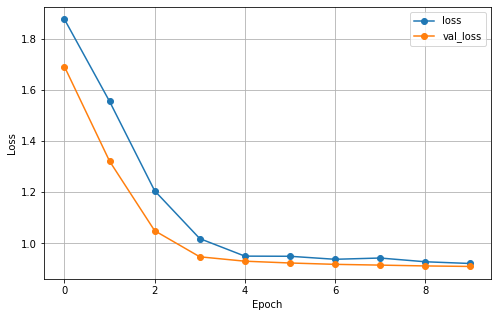

In [91]:
plt.plot(lstm_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(lstm_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM classification with w2v

In [92]:
lstmW2V_pred = np.round(model.predict(x_test))

5/5 [==============================] - 2s 265ms/step


In [93]:
print('Accuracy %s' % accuracy_score(y_test, lstmW2V_pred))
print('F1-score %s' % f1_score(y_test, lstmW2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstmW2V_pred))

Accuracy 0.8445945945945946
F1-score [0.         0.91575092 0.         0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.84      1.00      0.92       125
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         0

   micro avg       0.84      0.84      0.84       148
   macro avg       0.12      0.14      0.13       148
weighted avg       0.71      0.84      0.77       148
 samples avg       0.84      0.84      0.84       148



#CNN Classification with Word2Vec

In [94]:
filters=10
kernel_size=3
epochs=20

In [95]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable=False, embeddings_initializer=Constant(embed_matrix)))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1378, 300)         8327400   
                                                                 
 conv1d_1 (Conv1D)           (None, 1376, 10)          9010      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                      

In [96]:
cnn_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
cnn_w2v

Epoch 1/20
8/8 [==============================] - 4s 436ms/step - loss: 1.7721 - accuracy: 0.4883 - val_loss: 0.8302 - val_accuracy: 0.7542
Epoch 2/20
8/8 [==============================] - 3s 412ms/step - loss: 0.9614 - accuracy: 0.7389 - val_loss: 0.7559 - val_accuracy: 0.7542
Epoch 3/20
8/8 [==============================] - 3s 407ms/step - loss: 0.8912 - accuracy: 0.7473 - val_loss: 0.7139 - val_accuracy: 0.7542
Epoch 4/20
8/8 [==============================] - 3s 402ms/step - loss: 0.8664 - accuracy: 0.7389 - val_loss: 0.7094 - val_accuracy: 0.7542
Epoch 5/20
8/8 [==============================] - 4s 571ms/step - loss: 0.8389 - accuracy: 0.7431 - val_loss: 0.6983 - val_accuracy: 0.7542
Epoch 6/20
8/8 [==============================] - 5s 548ms/step - loss: 0.8101 - accuracy: 0.7516 - val_loss: 0.6949 - val_accuracy: 0.7542
Epoch 7/20
8/8 [==============================] - 3s 417ms/step - loss: 0.7931 - accuracy: 0.7410 - val_loss: 0.7015 - val_accuracy: 0.7542
Epoch 8/20
8/8 [====

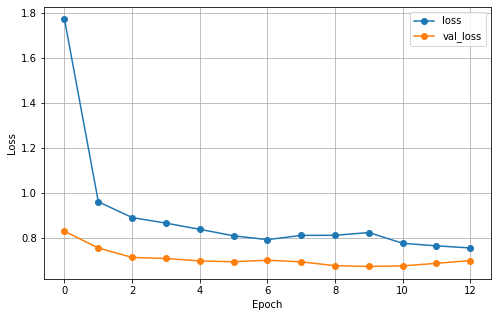

In [97]:
plt.plot(cnn_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(cnn_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN classification with w2v

In [98]:
cnnW2V_pred = np.round(model.predict(x_test))

5/5 [==============================] - 0s 60ms/step


In [99]:
print('Accuracy %s' % accuracy_score(y_test, cnnW2V_pred))
print('F1-score %s' % f1_score(y_test, cnnW2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnnW2V_pred, zero_division=1))

Accuracy 0.7702702702702703
F1-score [0.         0.92307692 0.         0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.93      0.91      0.92       125
           2       1.00      0.00      0.00         2
           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00         2
           5       1.00      0.00      0.00         5
           6       1.00      1.00      1.00         0

   micro avg       0.93      0.77      0.84       148
   macro avg       0.13      0.13      0.13       148
weighted avg       0.79      0.77      0.78       148
 samples avg       0.77      0.77      0.77       148

